<a href="https://colab.research.google.com/github/jasmis1229/task3-1/blob/main/task3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

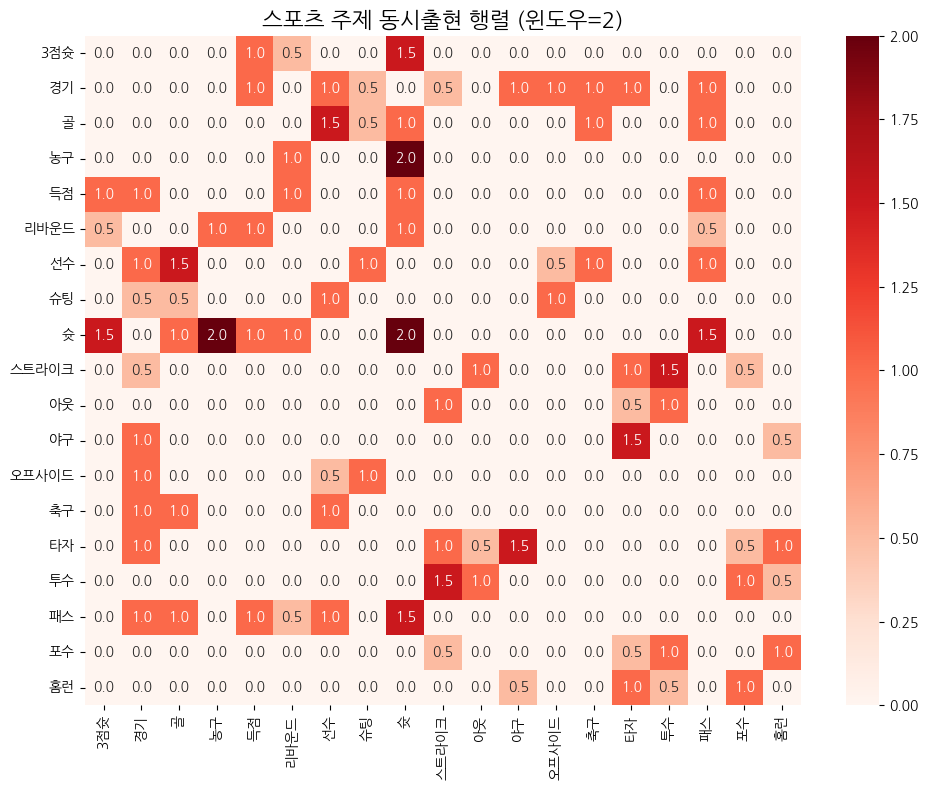

In [3]:
# 한글 폰트 설정 (Colab 전용, 처음 1회 실행)
!apt-get -qq install -y fonts-nanum
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for font in font_list:
    fm.fontManager.addfont(font)

# 라이브러리
import seaborn as sns
from collections import defaultdict
from scipy import sparse
import numpy as np

# 스포츠 주제 코퍼스
tokenized_corpus_sports = [
    ["축구", "경기", "선수", "패스", "골", "슛"],
    ["야구", "타자", "홈런", "포수", "투수", "스트라이크"],
    ["농구", "리바운드", "슛", "패스", "득점", "경기"],
    ["축구", "골", "선수", "슈팅", "오프사이드", "경기"],
    ["야구", "경기", "타자", "스트라이크", "아웃", "투수"],
    ["농구", "슛", "슛", "3점슛", "득점", "리바운드"]
]

# 단어-인덱스 매핑
all_words = sorted(set(word for sentence in tokenized_corpus_sports for word in sentence))
word_to_id_sports = {word: idx for idx, word in enumerate(all_words)}
id_to_word_sports = {idx: word for word, idx in word_to_id_sports.items()}

# 동시출현 행렬 생성 함수
def build_cooccurrence_matrix_sports(corpus, word_to_id, window_size=2):
    vocab_size = len(word_to_id)
    cooccur = defaultdict(float)

    for sentence in corpus:
        for i, center_word in enumerate(sentence):
            if center_word not in word_to_id:
                continue
            center_id = word_to_id[center_word]
            for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
                if i == j:
                    continue
                context_word = sentence[j]
                if context_word not in word_to_id:
                    continue
                context_id = word_to_id[context_word]
                distance = abs(j - i)
                weight = 1.0 / distance
                cooccur[(center_id, context_id)] += weight

    row, col, data = zip(*[(i, j, v) for (i, j), v in cooccur.items()])
    return sparse.csr_matrix((data, (row, col)), shape=(vocab_size, vocab_size))

# 행렬 생성
sports_matrix = build_cooccurrence_matrix_sports(tokenized_corpus_sports, word_to_id_sports, window_size=2)

# 시각화
plt.figure(figsize=(10, 8))
indices = [word_to_id_sports[word] for word in all_words]
matrix = sports_matrix[indices, :][:, indices].todense()

sns.heatmap(matrix, xticklabels=all_words, yticklabels=all_words, cmap="Reds", annot=True, fmt=".1f")
plt.title("스포츠 주제 동시출현 행렬 (윈도우=2)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()